<a href="https://colab.research.google.com/github/PierreFontaine/TNS/blob/master/Copie_de_tds_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Note

## Energie : 

signal * (transposée(signal)) / L

# TP Numéro 1

## Introduction

Pour ce compte rendu de tp nous décrouvrirons au fil de ce compte rendu Jupyter les applications possibles du traitement de signal.

Le premier problème permet de prendre en main les différentes fonctions utiles afin de réaliser des fft, ifft, de tracer des courbes ...

Le second problème repose sur un cas pratique basé sur la fréquence des touches téléphoniques.

## Problème 1



### Outils

Nous allons importer quelques libraries utiles, celles ci sont : 


*   numpy 
*   scipy
*   matplotlib

Les documentations sont accessibles ici : https://docs.scipy.org/doc/



In [0]:
!pip install numpy scipy

In [0]:
import numpy as np 
import scipy as sp
from scipy.fftpack import *
import matplotlib.pyplot as plt

In [0]:
from scipy.signal import find_peaks
from scipy.signal import peak_widths

### Question 1

Dans la cellule suivante, nous allons définir quelques variables utiles.

*Nombre d'échantillons*

$$L = 10^4$$

*Fréquence d'échantillonage*

$$Fe = 2 * 10^6 Hz = 2 MHz$$

*Période d'échantillonage*

$$Te = \frac{1}{Fe}$$

Nous allons définir un vecteur temps, en effet nous savons que chaque échantillons est pris à intervalle régulier $Te$. Nous définissons donc un vecteur $t = Te * [0,L]$

In [0]:
L = 10000
Fe = 200000
Te = 1 / Fe 
t = np.arange(0,L) * Te

In [0]:
x = np.zeros(L)

In [0]:
x[700:1200] = np.sin((np.pi * np.arange(0,500,1))/500) * np.cos((np.pi * np.arange(0,500,1))/25)

*Modulation :*

$$s(nT_{e}) = sin(\pi nT_{e} * \frac{1}{500}) * cos(\pi nT_{e} * \frac{1}{25})$$


---


Retrouvons les fréquences des nos signaux :

*formule de base :*

$$ s(t) = cos(2\pi tf)$$

*signal :*

$$ s(t) = cos(\pi*t* \frac{1}{25})$$

*identification :*

$$2f = \frac{1}{25}$$

$$f = \frac{1}{50} = 2 * 10^{-2} \texttt{Hz}$$

*Domaine temporelle vers echantilloné*:

$$f_{final} = f * f_e = 2 * 10^{-2} * 2 * 10^{5} = 4 * 10^{3}\texttt{Hz}$$



---

*formule de base :*

$$ s(t) = sin(2\pi tf)$$

*signal :*

$$ s(t) = sin(\pi*t* \frac{1}{500})$$

*identification :*

$$2f = \frac{1}{500}$$

$$f = \frac{1}{1000} = 10^{-3} \texttt{Hz}$$

*Domaine temporelle vers echantilloné*:

$$f_{final} = f * f_e = 10^{-3} * 2 * 10^{5} = 2 * 10^{2}\texttt{Hz}$$



In [0]:
x[0:300] = 1

In [42]:
a_0 = np.sum(x)
a_0/L

0.029920118283609947

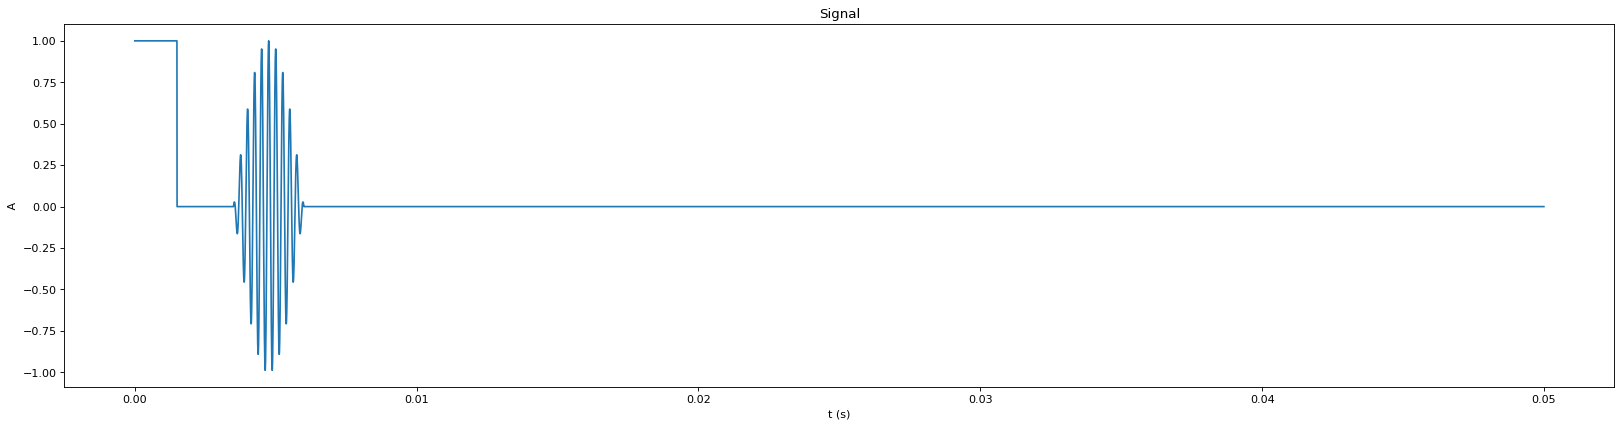

In [43]:
plt.figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, x)
plt.title("Signal")
plt.xlabel("t (s)")
plt.ylabel(" A ")
plt.show()

Ci dessus nous avons la figure correspondant au signal échantilloné.

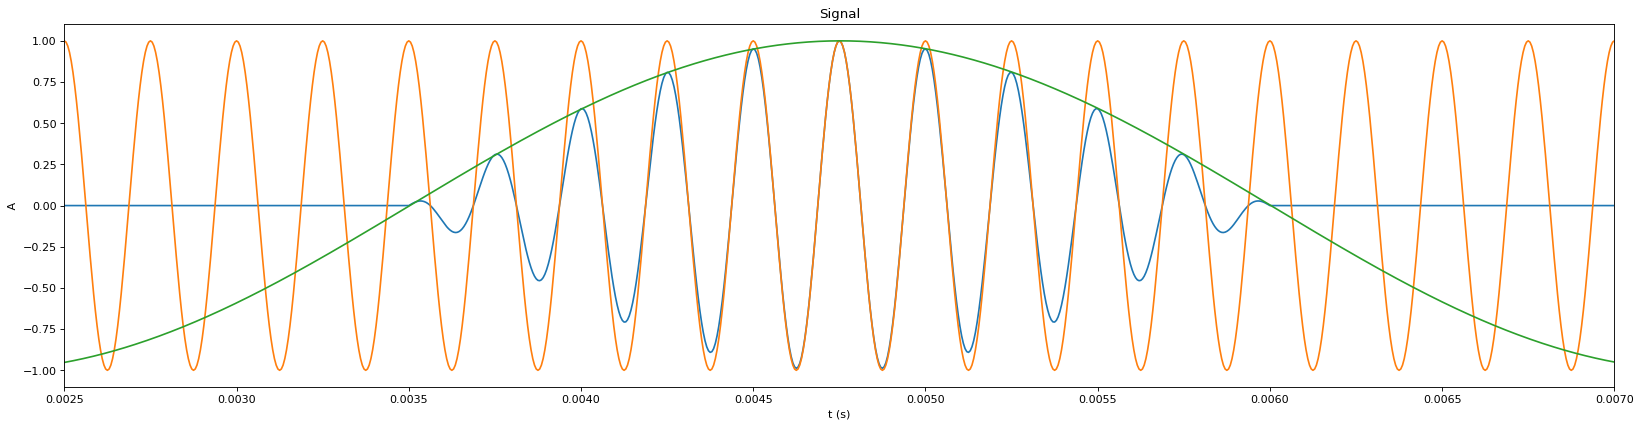

In [58]:
plt.figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, x)
plt.plot(t, np.cos(2*np.pi*4000*t))
plt.plot(t, np.sin((2 * np.pi * 200 * t) + (np.pi/1.67))) # On ajuste la phase
plt.title("Signal")
plt.xlabel("t (s)")
plt.ylabel(" A ")
plt.xlim(500*Te,1400*Te)
plt.show()

### Question 2

Dans cette petite partie nous allons étudier la transformée de Fourier sur le signal échantilloné dans la question précédente.

Tout d'abord commencons par appliquer l'algorithme fft sur notre vecteur $x$, nous appelons le résultat $\text{fft}_x$.

In [0]:
fft_x = np.abs(fft(x))
f = (Fe/L) * np.arange(0,L,1)

#### Allure générale de la courbe et de son spectre fréquentiel

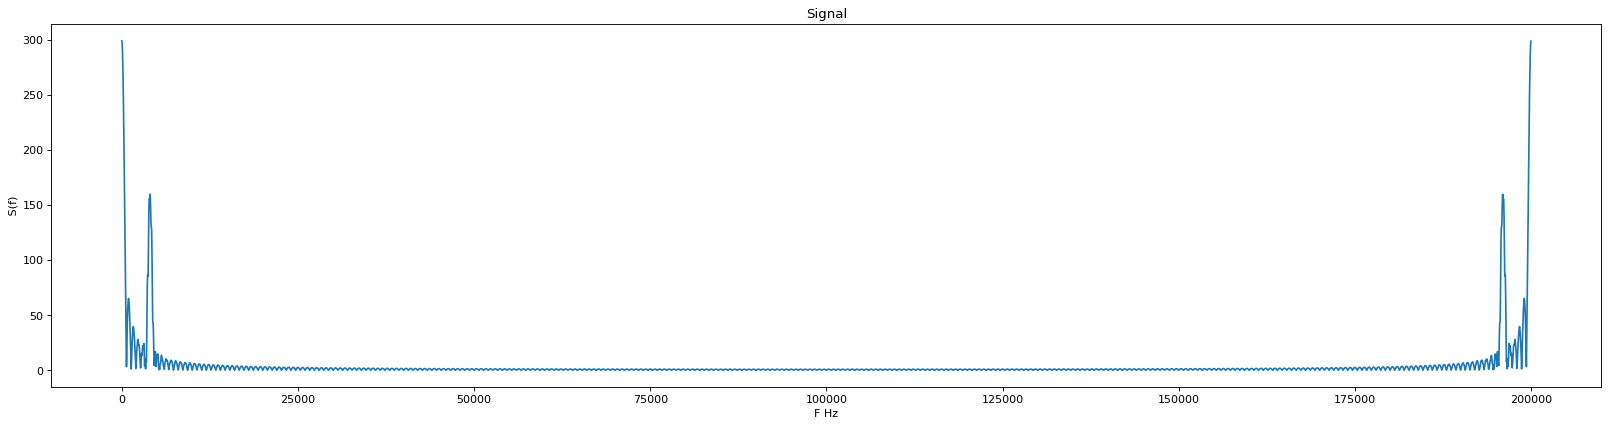

In [0]:
plt.figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(f, fft_x)
plt.title("Signal")
plt.xlabel("F Hz")
plt.ylabel(" S(f) ")
plt.show()

Ce que nous pouvons oberver ici est une figure avec une symétrie. Cela est du au fait que notre signal est issue de l'ensemble des réels $\mathbb{R}$.

Pour avoir une représentation plus parlante, nous allons centrer le resultat en 0 via la fonction `fftshift`. Cette représentation se nomme la *représentation spéctrale bilatérale* de S(f). Bien que la notion de fréquence négative n'est pas correcte d'un point de vue physique, elle exprime le sens de rotation de la vitesse angulaire.

In [0]:
fft_x_s = fftshift(np.abs(fft(x)))
f = (Fe/L) * np.arange(-L/2,L/2,1)

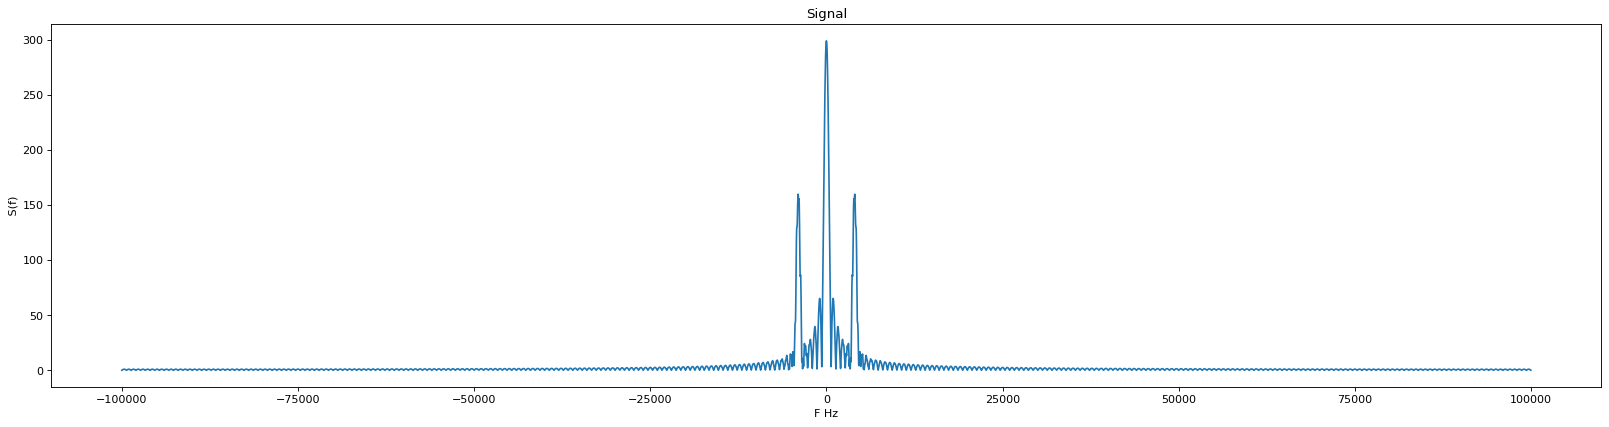

In [0]:
plt.figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(f, fft_x_s)
plt.title("Signal")
plt.xlabel("F Hz")
plt.ylabel(" S(f) ")
plt.show()

Nous notons que la symetrie des pics nous permet de déduire que le signal original est une sinusoide. Nous notons aussi un pic en 0, ce qui est typique d'un signal continu.

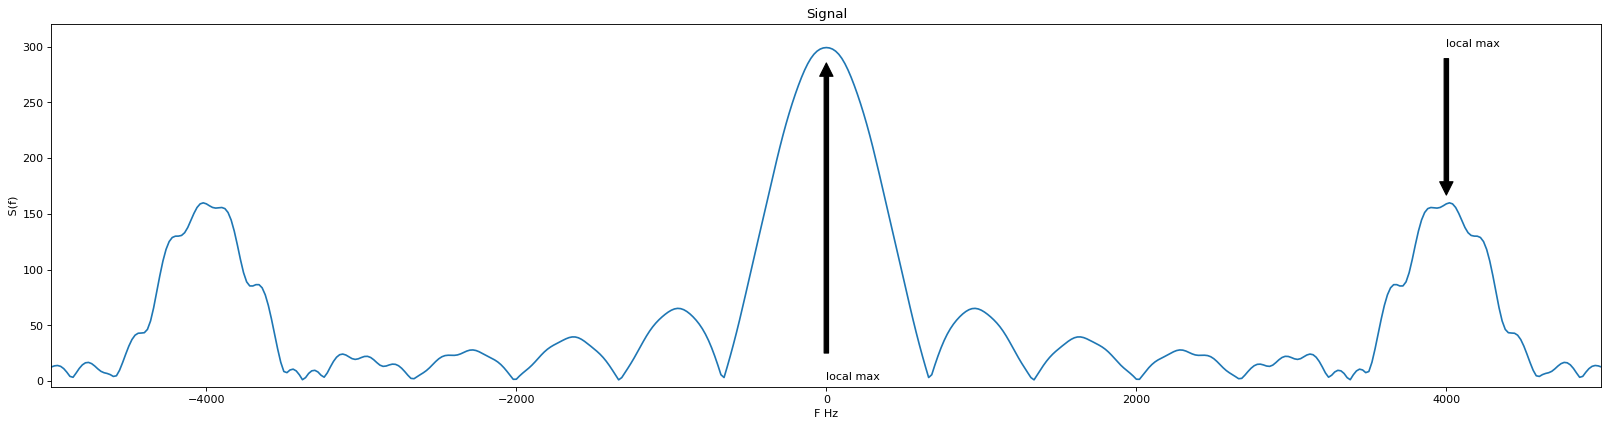

In [0]:
plt.figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(f, fft_x_s)
plt.title("Signal")
plt.xlabel("F Hz")
plt.ylabel(" S(f) ")
plt.xlim(-5000, 5000)
plt.ylim(-5, 320)
plt.annotate('local max', xy=(0, 300), xytext=(0, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.annotate('local max', xy=(4000, 160), xytext=(4000, 300),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.show()

#### Etude du premier lobe

La figure ci dessous nous donne un apercu le partie partie intéressente de la fft. Nous voyons 3 pics disctints situés en $0$, $4000$ et $-4000$. Ces 3 pics correspondent aux harmoniques du signal.

Etude du lobe du pic principale :

Appelons $\tau$ la largeur de notre fenetre, 
alors on a $\tau = 300$. Nous notons que le pic principale correspond au sinus cardinal issu de la transformée de fourier d'une porte.
Ainsi nous savons qu'elle s'annule en $\frac{1}{\tau} = \frac{1}{300}$

Or nous devons faire intervenir la fréquence d'échantillonage $F_e = 2 * 10^5 \texttt{Hz}$
Ainsi dans notre modèle, notre sinus cardinal s'annulera en $\frac{1}{300} * F_e = \frac{1}{300} * 200 000 = 666$

Maintenant nous faisons intervenir la symétrie, il suffit donc de multiplier par 2 notre valeur : $ 666 * 2 = 1332\texttt{Hz}$.

[]

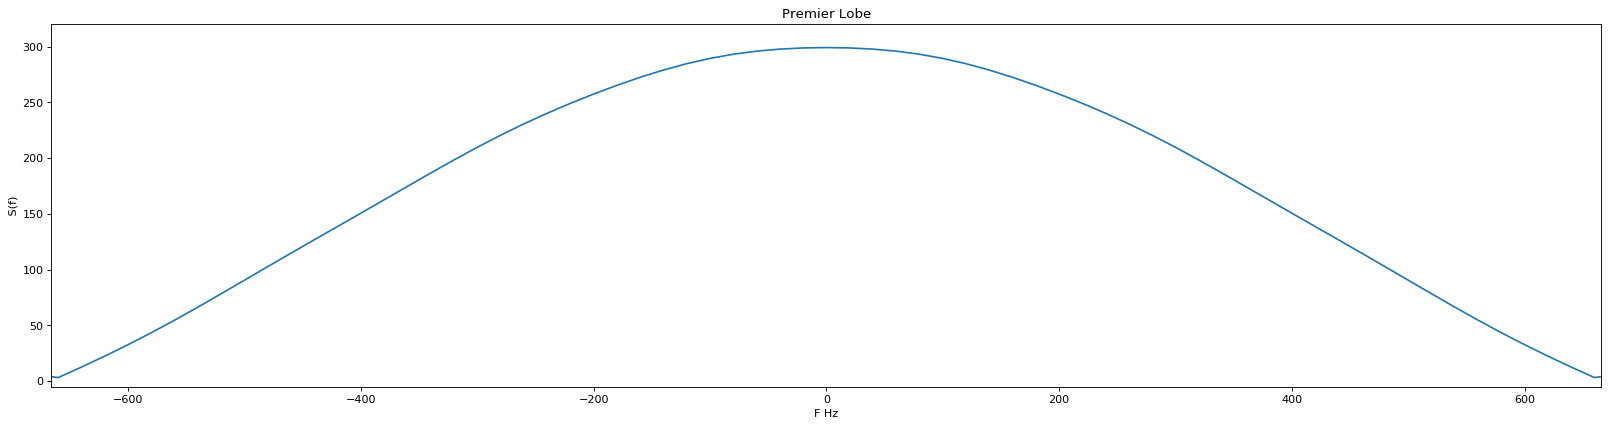

In [0]:
plt.figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(f, fft_x_s)
plt.title("Premier Lobe")
plt.xlabel("F Hz")
plt.ylabel(" S(f) ")
plt.xlim(-666, 666)
plt.ylim(-5, 320)
plt.plot()

#### Etude du second lobe

In [0]:
peaks, _ = find_peaks(np.abs(fft(x)[0:5000]), height=150)

In [0]:
f_z = (Fe/L) * np.arange(0,5000,1)

In [0]:
peaks * (Fe/L)

array([3900., 4020.])

Le bout de code ci dessus nous permet d'avoir la position exacte des extremums locaux, ils sont dont à $3900$ et $4020$.

Dans la figure suivante, nous effectuons un zoom sur la fft du signal entre 0 et 5000 et nous faisons apparaitre ces valeurs sur la courbe.

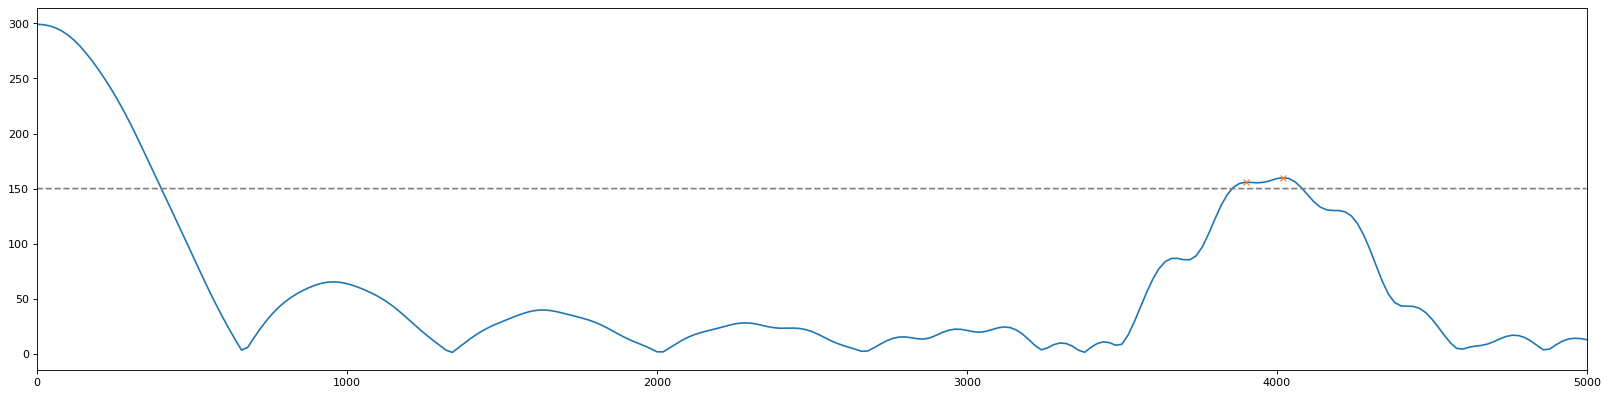

In [0]:
plt.figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(f_z, fft_x[0:5000])
plt.plot(peaks * (Fe/L), fft_x[0:5000][peaks], "x")
plt.plot(np.zeros_like(f[0:5000])+150, "--", color="gray")
plt.xlim(0,5000)
plt.show()

Que peut on dire sur les largeurs de bandes pour la ftt de notre partie sinusoidale ?


In [0]:
peaks_w = peak_widths(abs(fft(x))[0:5000], peaks)

for i, e in enumerate(peaks_w):
  if i in [2,3]:
    e[0] = e[0] * (Fe/L)
    e[1] = e[1] * (Fe/L)
    print(f"i vaut {i} : e vaut {e}")

print(*peaks_w[1:])

i vaut 2 : e vaut [3894.7839918  3629.90465362]
i vaut 3 : e vaut [3920.09511133 4319.41405643]
[155.50891773  80.58301378] [3894.7839918  3629.90465362] [3920.09511133 4319.41405643]


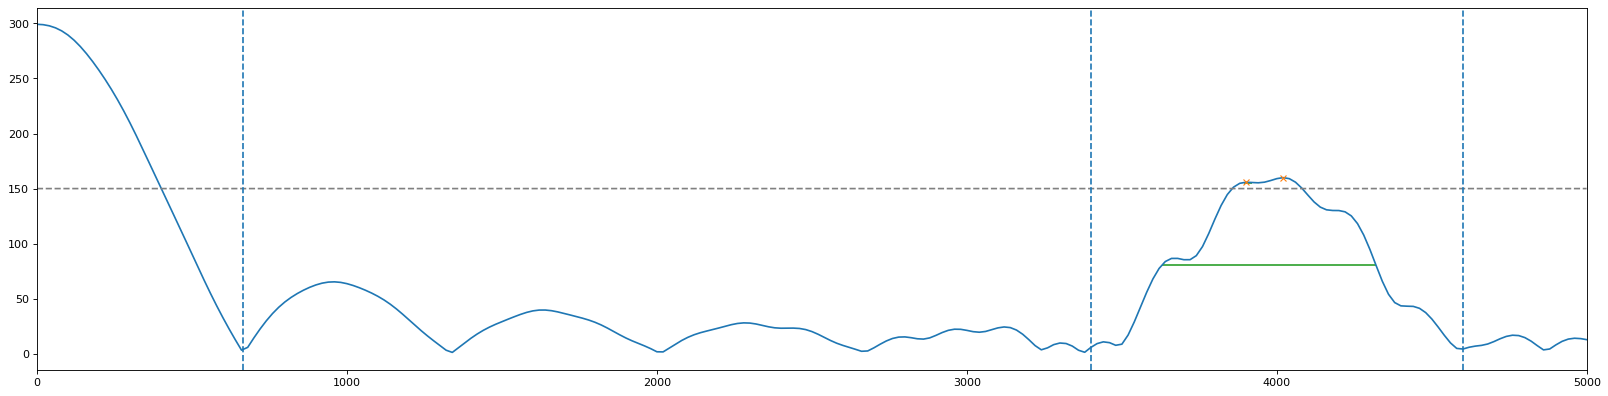

In [65]:
plt.figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(f_z, fft_x[0:5000])
plt.plot(peaks * (Fe/L), fft_x[0:5000][peaks], "x")
plt.plot(np.zeros_like(f[0:5000])+150, "--", color="gray")
plt.hlines(*peaks_w[1:], color="C2")
plt.axvline(x=3400, linestyle='--')
plt.axvline(x=4600, linestyle='--')
plt.axvline(x=666, linestyle='--')
plt.xlim(0,5000)
plt.show()

Aux alentours de $4000\texttt{Hz}$ nous avons 2 pics. En effet dans l'espace temporel nous avons une fenetre multiplié par un sinus à $200\texttt{Hz}$ et ce résultat et multiplié par un cosinus à $4000\texttt{Hz}$. Cela implique que dans l'espace fréquentiel nous convoluons un sinus cardinal avec un dirac en $+200\texttt{Hz}$ et $-200\texttt{Hz}$, et ce résultat est lui meme convolué avec un dirac en $+4000\texttt{Hz}$ et $-4000\texttt{Hz}$.

Si nous nous contentons de la partie positive du spectre, nous aurons deux pics dont un en $3800\texttt{Hz}$ et l'autre en $4200\texttt{Hz}$ et qui seront de largeur $\frac{1}{\tau} * Fe$ où $\tau$ vaut la largeur de la porte ici $500$. Les deux pics ont donc une largeur de $800\texttt{Hz}$, le lobe que nous voyons est donc la superposition de deux pics et s'étend de $3400\texttt{Hz}$ jusqu'à $4600\texttt{Hz}$.

Ci dessous sont tracés les courbes montrant comment il est possible d'arriver à ce résulats en tracant les resulats successifs. Nous nous sommes permis d'enlever le signal rectangulaire de 0 à 300 dans le but de supprimer les variations induites indésirables

In [0]:
print(L)
sig_sin_pic = np.zeros(L)
sig_por_pic = np.zeros(L)
sig_cos_pic = np.zeros(L)

10000


In [0]:
sig_sin_pic[700:1200] = np.sin((np.pi * np.arange(0,500,1))/500)
sig_por_pic[700:1200] = 1
sig_cos_pic[700:1200] = np.cos((np.pi * np.arange(0,500,1))/25)

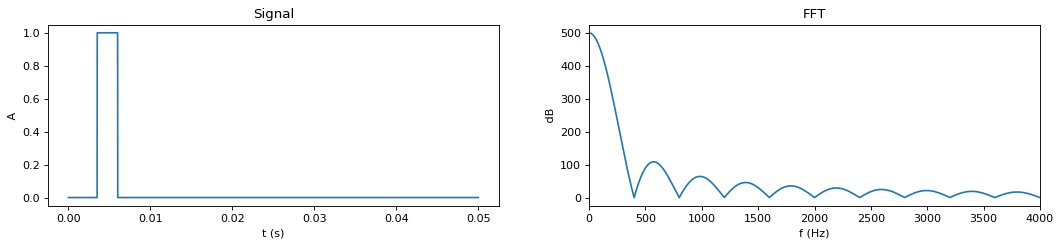

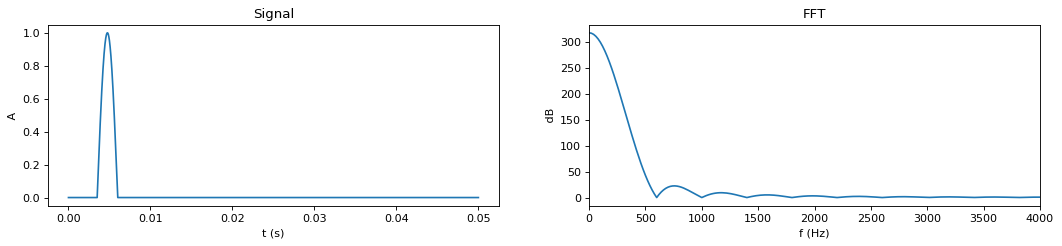

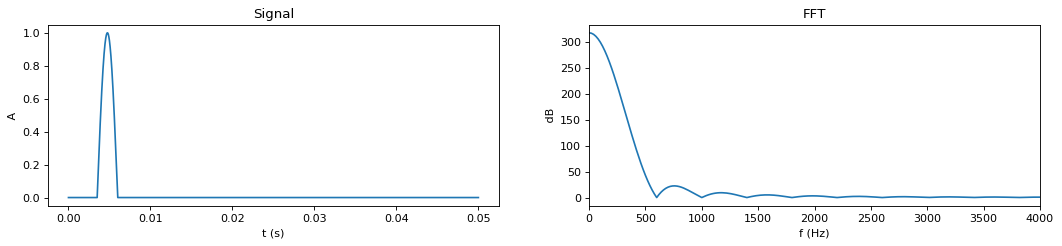

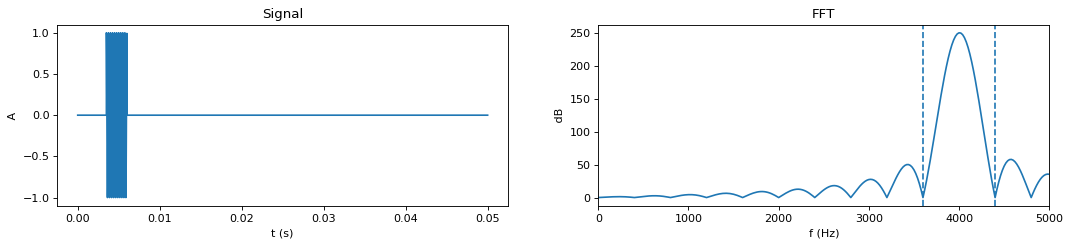

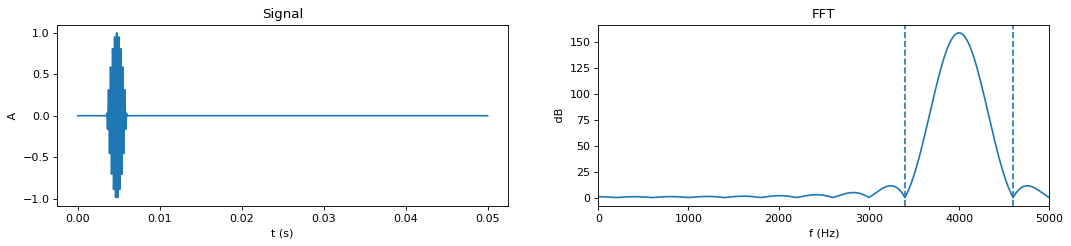

In [68]:
plt.figure(num=None, figsize=(16, 3), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.plot(t, sig_por_pic)
plt.title("Signal")
plt.xlabel("t (s)")
plt.ylabel(" A ")
plt.subplot(1, 2, 2)
plt.plot(f, fftshift(abs(fft(sig_por_pic))))
plt.xlim(0,4000)
plt.title("FFT")
plt.xlabel("f (Hz)")
plt.ylabel(" dB ")
plt.show()

plt.figure(num=None, figsize=(16, 3), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.plot(t, sig_sin_pic)
plt.title("Signal")
plt.xlabel("t (s)")
plt.ylabel(" A ")
plt.subplot(1, 2, 2)
plt.plot(f, fftshift(abs(fft(sig_sin_pic))))
plt.xlim(0,4000)
plt.title("FFT")
plt.xlabel("f (Hz)")
plt.ylabel(" dB ")
plt.show()

plt.figure(num=None, figsize=(16, 3), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.plot(t, sig_sin_pic * sig_por_pic)
plt.title("Signal")
plt.xlabel("t (s)")
plt.ylabel(" A ")
plt.subplot(1, 2, 2)
plt.plot(f,fftshift(abs(fft(sig_sin_pic * sig_por_pic))))
plt.xlim(0,4000)
plt.title("FFT")
plt.xlabel("f (Hz)")
plt.ylabel(" dB ")
plt.show()

plt.figure(num=None, figsize=(16, 3), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.plot(t, sig_cos_pic)
plt.title("Signal")
plt.xlabel("t (s)")
plt.ylabel(" A ")
plt.subplot(1, 2, 2)
plt.plot(f, fftshift(abs(fft(sig_cos_pic))))
plt.axvline(x=4400, linestyle='--')
plt.axvline(x=3600, linestyle='--')
plt.xlim(0,5000)
plt.title("FFT")
plt.xlabel("f (Hz)")
plt.ylabel(" dB ")
plt.show()

plt.figure(num=None, figsize=(16, 3), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.plot(t, sig_sin_pic * sig_por_pic * sig_cos_pic)

plt.title("Signal")
plt.xlabel("t (s)")
plt.ylabel(" A ")
plt.subplot(1, 2, 2)
plt.plot(f, fftshift(abs(fft(sig_sin_pic * sig_por_pic * sig_cos_pic))))
plt.axvline(x=4600, linestyle='--')
plt.axvline(x=3400, linestyle='--')
plt.xlim(0,5000)
plt.title("FFT")
plt.xlabel("f (Hz)")
plt.ylabel(" dB ")
plt.show()

#### Etude de l'énergie du signal

### Question 3

Dans cette partie nous allons étudier le comportement des nos applications fft et ifft lorsque que nous sous echantillonons un signal.

In [0]:
dirac = [1, 0, 0, 0, 0]
delta_t0 = np.kron(np.ones(10000//5), dirac)
print(delta_t0)

[1. 0. 0. ... 0. 0. 0.]




---


**Produit Kron**

Ici notre vecteur Kron permet de substituer chaque 1 du vecteur passer en premier argument par le vecteur en second argument.

---



Ci dessous nous multiplions notre signal échantilloné par un peigne de 200 Diracs.

Nous avons un pic tous les $T_{ed} = 5$ donc dans l'espace fréquentiel, la transformée de Fourier nous donnera un pic tous les $F_{ed} = \frac{1}{T_{ed}} = 40*10^3 \texttt{Hz}$

In [0]:
delta_d0 = x * delta_t0

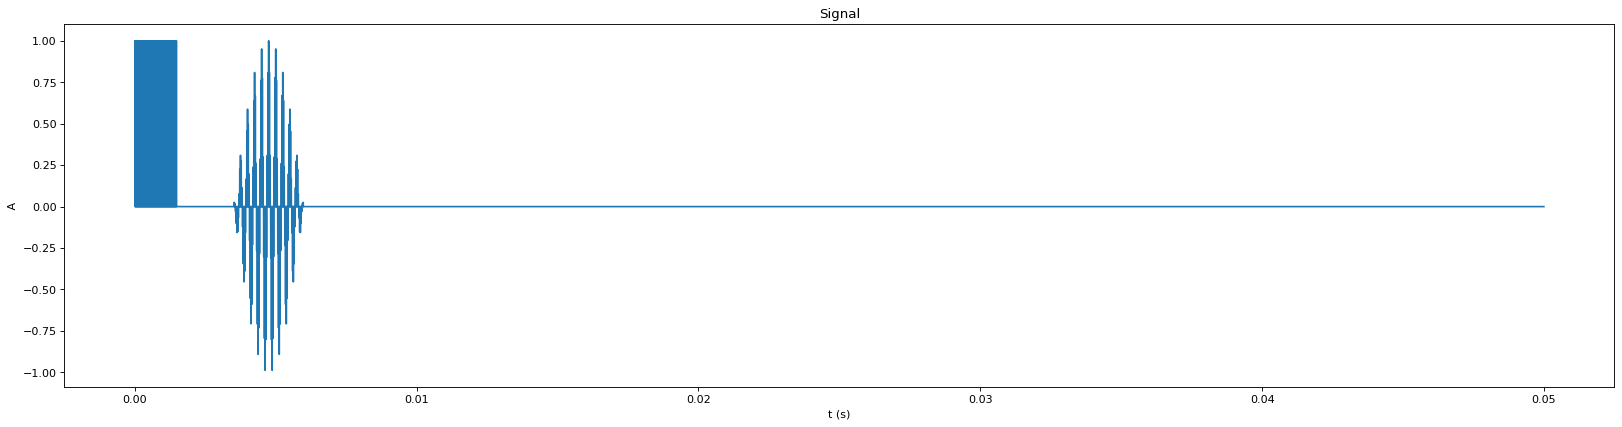

In [0]:
plt.figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, delta_d0)
plt.title("Signal")
plt.xlabel("t (s)")
plt.ylabel(" A ")
plt.show()

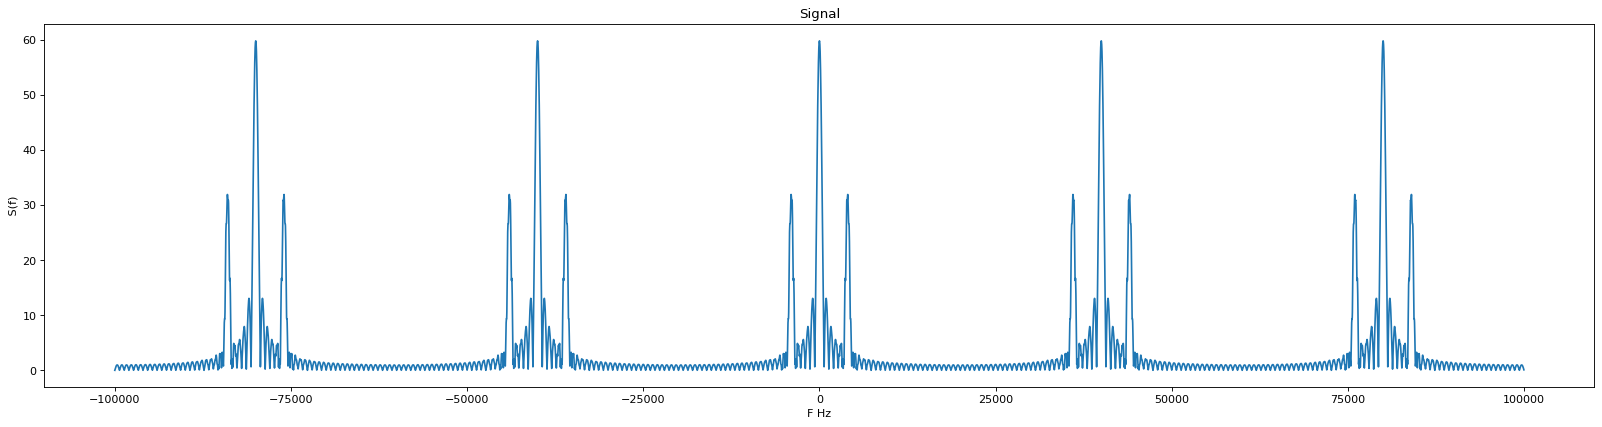

In [0]:
plt.figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(f, fftshift(abs(fft(delta_d0))))
plt.title("Signal")
plt.xlabel("F Hz")
plt.ylabel(" S(f) ")
plt.show()

Dans la figure tracée si dessus, nous remarquons bien que le shéma se répète tous les $40*10^3 \texttt{Hz}$. En effet, le spectre du signal échantilloné est convolué avec le spectre du peigne de Dirac, autrement dit déplacé dans le temps pour chaque multiple de $40*10^3 \texttt{Hz}$.

### Question 4

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


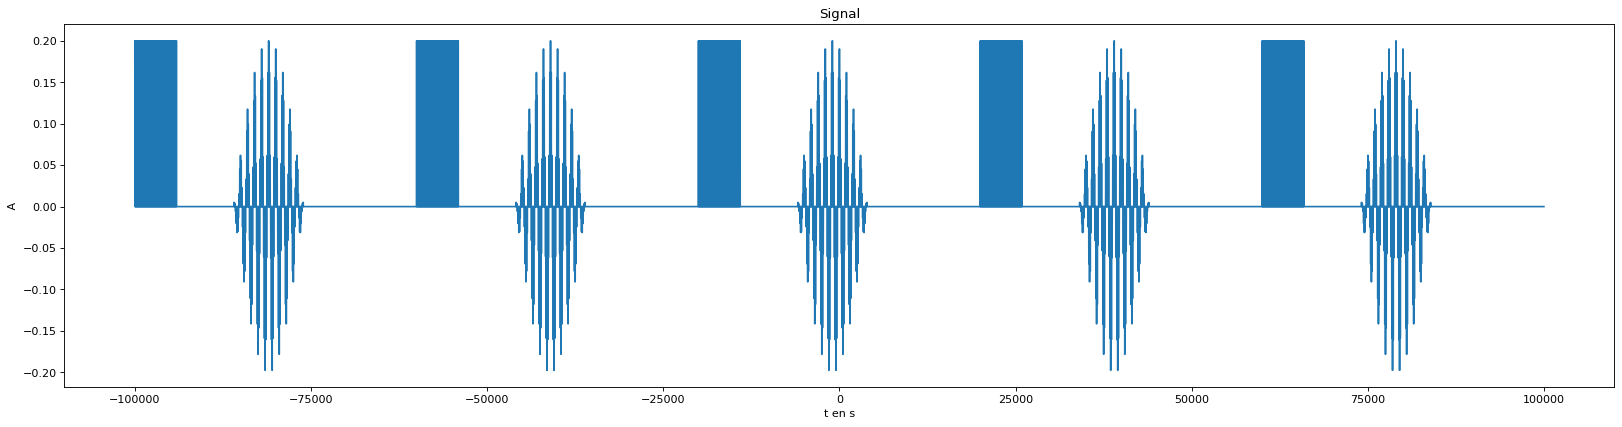

In [0]:
plt.figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(f, ifft(fft(delta_d0)*delta_t0))
plt.title("Signal")
plt.xlabel("t en s")
plt.ylabel(" A ")
plt.show()

### Question 5

In [0]:
dirac = [1] + [0] * 9
print(dirac)
delta_t0 = np.kron(np.ones(10000//10), dirac)
print(delta_t0)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1. 0. 0. ... 0. 0. 0.]


In [0]:
delta_d0 = x * delta_t0

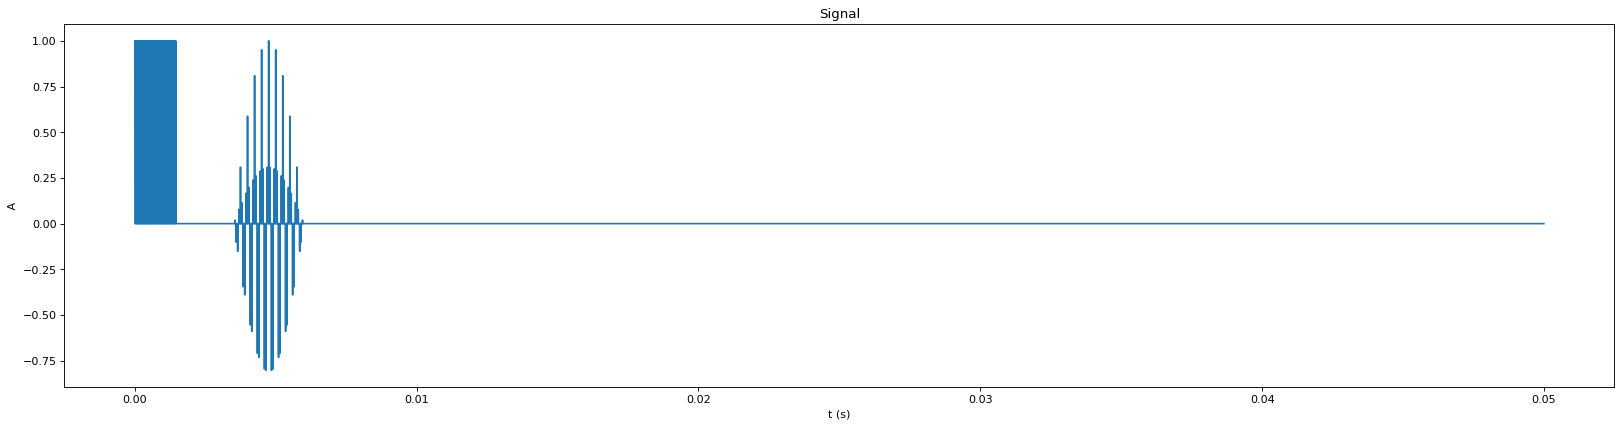

In [0]:
plt.figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, delta_d0)
plt.title("Signal")
plt.xlabel("t (s)")
plt.ylabel(" A ")
plt.show()

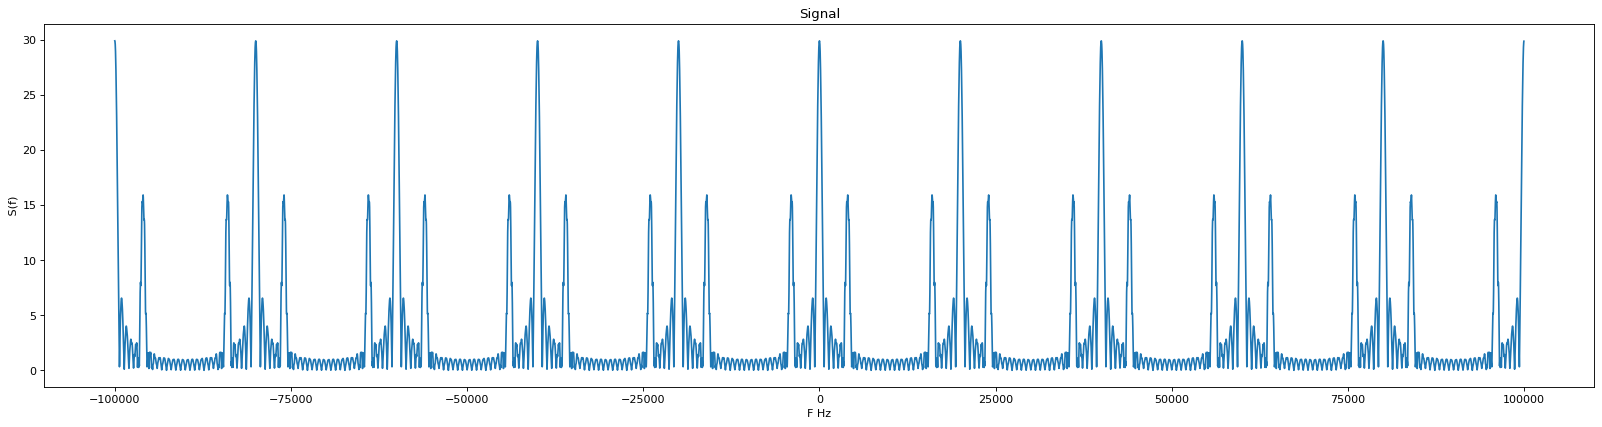

In [0]:
plt.figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(f, fftshift(abs(fft(delta_d0))))
plt.title("Signal")
plt.xlabel("F Hz")
plt.ylabel(" S(f) ")
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


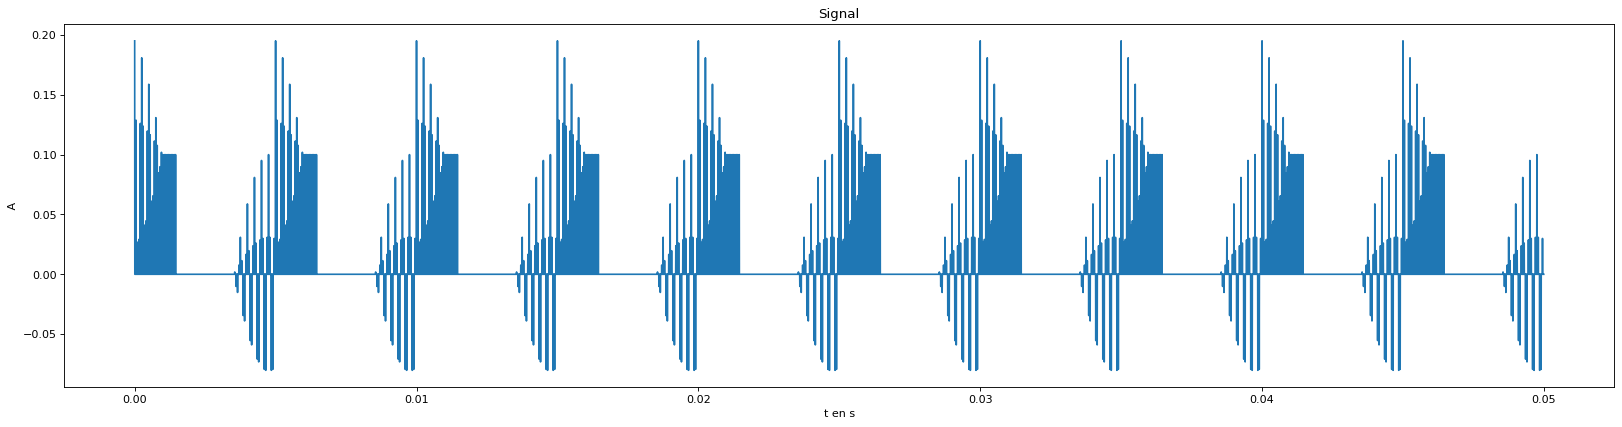

In [0]:
plt.figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, ifft(fft(delta_d0)*delta_t0))
plt.title("Signal")
plt.xlabel("t en s")
plt.ylabel(" A ")
plt.show()